## Práctica Final Aprendizaje por refuerzo. Value Iteration vs Temporal Difference Learning vs Q-Learning

El objetivo de esta práctica es comparar los tres algoritmos de aprendizaje que conocemos de aprendizaje por refuerzo en el problema del Taxi. 

Primero importamos todas las librerías necesarias:

In [3]:
import gym # openAi gym
from gym import envs
import numpy as np 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd 
from time import sleep
import math
import random

import warnings
warnings.filterwarnings('ignore')

c:\Users\Arribas\anaconda3\envs\TFG\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\Arribas\anaconda3\envs\TFG\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


Recordamos como podemos crear un ambiente del problema del Taxi y como podemos visualizarlo:

In [6]:
env = gym.make('Taxi-v3')
env.reset()
env.render()

In [7]:
n_states = env.observation_space.n   #Número de estados
print(n_states)

500


In [8]:
n_actions = env.action_space.n   #Número de acciones
print(n_actions)

6


Primero debes programar el algoritmo **Value Iteration** para obtener la estrategia óptima. En el problema del Taxi, la matriz P contiene el modelo de transición de estados `[(p, snew, rew, done)] = env.P[state][a]`. p corresponde a la probabilidad de pasar de **s** a **snew** al aplicar la acción **a**. Todas las probabilidades son 1, por tanto es un modelo de transición de estados determinista. 

In [9]:
def ValueIteration(env):
    n_states = env.observation_space.n
    Value = [0 for i in range(n_states)]

            
    return Value

Una vez que has obtenido el vector V con las utilidades de los estados, con la siguiente función puedes obtener la estrategia óptima:

In [10]:
def fromVtopolicy(env, V):
    policy = np.zeros([env.observation_space.n, env.action_space.n])
    for s in range(env.observation_space.n):
        values = []
        for a in range(env.action_space.n):
            [(p, s_, rew, done)] = env.P[s][a]
            values.append(rew+ gamma*V[s_])
        best_act= np.argmax(values)
        policy[s,best_act] = 1.0
    return policy

In [11]:
gamma = 0.99
Vopt = ValueIteration(env)
policyopt = fromVtopolicy(env, Vopt)

Con la siguiente función contamos el número de pasos que cuesta llegar hasta el estado final siguiendo las acciones de una estrategia:

In [12]:
def count(policy, env):
    curr_state = env.reset()
    counter = 0
    done=False
    while(not done):
        state, reward, done, info = env.step(np.argmax(policy[curr_state]))
        curr_state = state
        counter += 1
    return counter

De esta forma podemos mostrar el número de pasos que cuesta llegar hasta el estado final para diferentes estados iniciales y calculamos la media:

Un agente que utiliza una estrategia obtenida por Value iteration le cuesta una media de 200.0 pasos para completar satisfactoriamente la misión.


<AxesSubplot:ylabel='Density'>

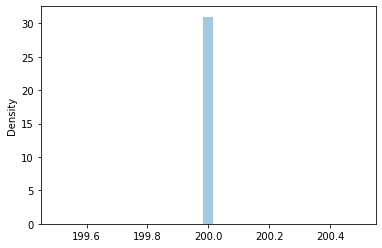

In [13]:
env = gym.make("Taxi-v3")
curr_state = env.reset()
val_counts = [count(policyopt, env) for i in range(1000)]
print("Un agente que utiliza una estrategia obtenida por Value iteration le cuesta una media de " + str(np.mean(val_counts))
      + " pasos para completar satisfactoriamente la misión.")
sns.distplot(val_counts)

### Q-learning
En algoritmo Q-learning el agente va a ir realizando episodios (intentos de resolver el problema) y cada vez que realice una acción va a ir actualizando la tabla de valores $Q$. El valor $Q(s,a)$ representa la calidad o utilidad de realizar una acción $a$ estando en un estado $s$. El valor de calidad Q es otra forma de representar la ecuación de Bellman sobre la utilidad esperada de un estado:

$Q(s,a) = R(s,a) + \gamma \sum_{s'}T(s,a,s')max_{a'}Q(s',a')$ 

A partir de esta ecuación basandonos en idea de *temporal difference learning* obtenemos la ecuación de actualización de los valores de $Q$:

$Q(s,a) := Q(s,a) + \alpha(R(s,a) + \gamma max_{a'}{Q(s',a')} - Q(s,a))$

Primero vamos a crear la tabla Q:

In [14]:
Q_table = np.zeros((n_states, n_actions))

Para que en el periodo de aprendizaje el agente pruebe caminos que no son los que le indica la tabla Q, vamos a hacer que el agente tome acciones aleatorias con una probabilidad. Crea una función que devuelva la acción a realizar según la tabla Q si un valor que generamos de forma aletaria es mayor que epsilon (por defecto epsilon = 0.1) y en caso contrario la acción será aleatoria.

In [15]:
def ActionwithExploration(Q, n_actions, s, epsilon = 0.1):
    """
    Q: tabla de utilidad (n_states x n_actions)
    epsilon: parámetro para la exploración
    s: estado actual
    """
    rand=np.random.uniform(0,1)


    return action

Estos son los valores de los parámetros para converger a una solución. Primero prueba tu algoritmo con menos episodios para comprobar que converge: 

In [16]:
alpha = 0.2
gamma = 0.99
epsilon = 0.1
episodes = 10000 # 100
max_steps = 2500

Completa el código del algoritmo Q_learning siguiendo el pseudocogido de las transparencias:

In [17]:
from IPython.display import clear_output

Q_table = np.zeros((n_states, n_actions))
env = gym.make("Taxi-v3").env
timestep_reward = []

for episode in range(episodes):
 
    state = env.reset()
    total_reward = 0
    done = False

    t = 0
    while t < max_steps:
        t += 1
        # Completa aquí tu código
       
        
        
        if done:
            if episode % 10 == 0:
                clear_output(wait=True)
                print(f"Este episodio {episode} tuvo {t} pasos y recompensa de {total_reward}")
            timestep_reward.append(total_reward)
            break

        
print("Entrenamiento de la tabla Q ha finalizado.\n")


Entrenamiento de la tabla Q ha finalizado.



Imprime el vector timestep_reward para ver si el algoritmo converge. Si la recomensa total del episodio cada vez es menor significa que converge ya que los valores de los estados guían al taxi a realizar acciones correctas.

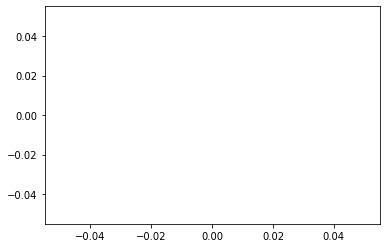

In [18]:
import matplotlib.pyplot as plt
plt.plot(timestep_reward)

Crea una función fromQtopolicy(env,Q) en la que se devuelva la estrategia en forma matrix (n_estados x n_acciones) a partir de los valores de la utilizadad Q(s,a):

In [19]:
def fromQtopolicy(env,Q):
    policy = np.zeros([env.observation_space.n, env.action_space.n])

    return policy
    

Vamos a comprobar el número medio de pasos obtenidos por la estrategia aprendida por Q-Learning:

Un agente que utiliza una estrategia obtenida por Q-learning le cuesta una media de 200.0 pasos para completar satisfactoriamente la misión.


<AxesSubplot:ylabel='Density'>

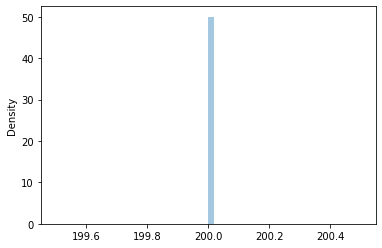

In [20]:
env = gym.make('Taxi-v3')
env.reset()
Q_learn_pol = fromQtopolicy(env,Q_table)
Q_counts = [count(Q_learn_pol,env) for i in range(10000)]
print("Un agente que utiliza una estrategia obtenida por Q-learning le cuesta una media de " + str(np.mean(val_counts))
      + " pasos para completar satisfactoriamente la misión.")
sns.distplot(Q_counts)

**Importante:** Compara las estrategias obtenidas con el algoritmo Value Iteration y con Q-Learning. ¿La media de pasos hasta el estado final es la misma?,¿En cuantos estados la acción escogida es diferente? Realiza algunas mejoras al algoritmo Q-Learning para ayudar a que converja a la estrategia optima. Por ejemplo, puedes crear una función Potencial (con `(x,y,p,d)=env.decode(estado)` puedes obtener la posición x, y del taxi, donde está el pasajero p y el destino d), también  puedes modificar los valores de alpha y epsilón confome avanzan los episodios. 
Añade las celdas que consideres oportuno y una celda con texto al final para explicar lo que has hecho y las conclusiones que has obtenido.

**Extra:** Realiza la misma comparación y propón alguna mejora con el algoritmo TDL(lambda)

**Visualización:** Con esta función podemos visualizar el recorrido del taxi siguiendo las acciones de la estrategia: 

In [22]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.5)
        


In [23]:
import random 
env = gym.make("Taxi-v3").env
curr_state = env.reset()

estrategia = Q_learn_pol
done = False
frames = []
while not done:
    a = np.argmax(estrategia[curr_state])
    state, reward, done, info = env.step(a) 
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )
    curr_state = state
    
print_frames(frames)

NameError: name 'action' is not defined

: 